In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from tqdm import tqdm

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('figure', dpi=120)
plt.rc('savefig', bbox='tight')

cols = ['RA', 'DEC', 'photo_z', 'MASS_BEST']
# download from https://www.scidb.cn/en/file?fid=92b8d8273c8c70e8db718a1e22bb331c&mode=front
tbl = Table.read('data/desidr9_galaxy_cspcat.fits', memmap=True)
# run the preprocess.sh script
cut_tbl = Table.read('data/desidr9_galaxy_cspcat_cut.fits', memmap=True)

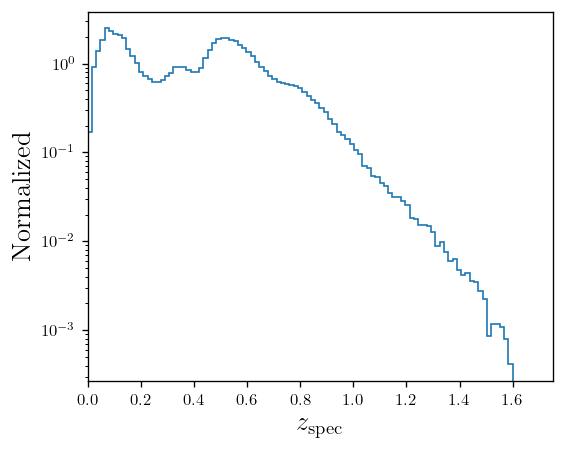

In [12]:
# Figure 2.1 Zou et al. 2022

plt.figure(figsize=(5, 4))
plt.hist(cut_tbl['spec_z'], bins=np.linspace(0, 1.6, 100), density=True, histtype='step')
plt.yscale('log')
plt.xlim(0, 1.75)
plt.xlabel(r'$z_{\rm spec}$', fontsize=16)
plt.ylabel('Normalized', fontsize=16)
plt.show()

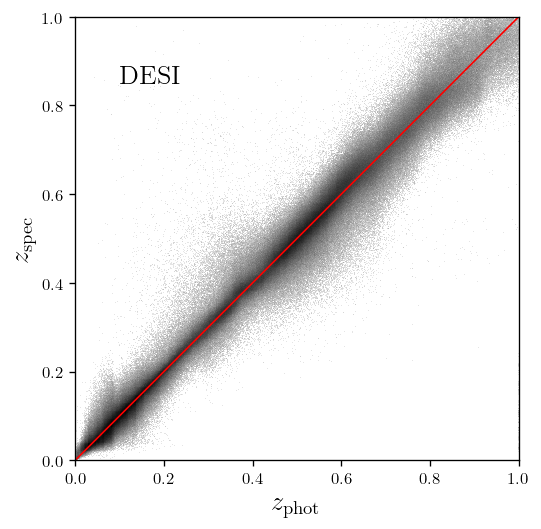

In [23]:
# Figure 3.1 Zou et al. 2022

x = np.linspace(0, 1., 500)
plt.hist2d(cut_tbl['spec_z'], cut_tbl['photo_z'], bins=(x, x), 
           cmap='gray_r', norm='log')
plt.plot(x, x, 'r', lw=1)
plt.gca().set_aspect('equal')
plt.text(0.1, 0.85, 'DESI', fontsize=16)
plt.xlabel(r'$z_{\rm spec}$', fontsize=16)
plt.ylabel(r'$z_{\rm phot}$', fontsize=16)
plt.show()

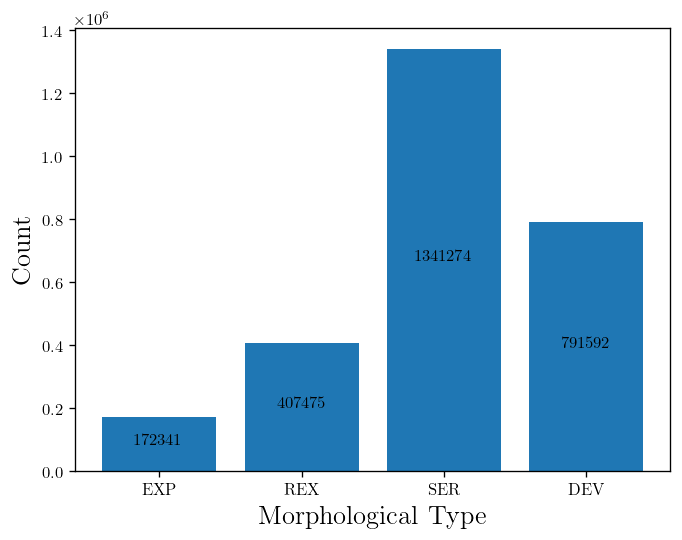

In [22]:
from collections import defaultdict

counter = defaultdict(int)
for typ in cut_tbl['TYPE']:
    counter[typ] += 1

def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha='center')

plt.bar(counter.keys(), counter.values())
addlabels(counter.keys(), list(counter.values()))
plt.xlabel('Morphological Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()